In [3]:
import numpy as np
import matplotlib.pyplot as plt
import copy,math
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
np.set_printoptions(precision=2)

In [4]:
data = pd.read_csv('Food_Delivery_Times.csv')
data

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


<a name="toc_15456_2.1"></a>
## 2.1 Matrix X containing our examples
Similar to the table above, examples are stored in a NumPy matrix `X_train`. Each row of the matrix represents one example. When you have $m$ training examples ( $m$ is three in our example), and there are $n$ features (four in our example), $\mathbf{X}$ is a matrix with dimensions ($m$, $n$) (m rows, n columns).


$$\mathbf{X} = 
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\ 
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}
$$
notation:
- $\mathbf{x}^{(i)}$ is vector containing example i. $\mathbf{x}^{(i)}$ $ = (x^{(i)}_0, x^{(i)}_1, \cdots,x^{(i)}_{n-1})$
- $x^{(i)}_j$ is element j in example i. The superscript in parenthesis indicates the example number while the subscript represents an element.  

Display the input data.

In [5]:
x_train = np.array(data[['Distance_km','Preparation_Time_min']])
x_train

array([[ 7.93, 12.  ],
       [16.42, 20.  ],
       [ 9.52, 28.  ],
       ...,
       [15.62, 26.  ],
       [14.17,  8.  ],
       [ 6.63, 24.  ]])

In [6]:
y_train = data['Delivery_Time_min']
y_train.shape

(1000,)

<a name="toc_15456_2.2"></a>
## 2.2 Parameter vector w, b

* $\mathbf{w}$ is a vector with $n$ elements.
  - Each element contains the parameter associated with one feature.
  - in our dataset, n is 4.
  - notionally, we draw this as a column vector

$$\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$
* $b$ is a scalar parameter.  

In [7]:
b_init = 20
w_init = np.arange(x_train.shape[1])
w_init

array([0, 1])

<a name="toc_15456_3"></a>
# 3 Model Prediction With Multiple Variables
The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`

To demonstrate the dot product, we will implement prediction using (1) and (2).

In [8]:
def predict(x,w,b):
    p = np.dot(x,w) + b
    return p


In [9]:
x_vec = x_train[0,:]
x_vec

array([ 7.93, 12.  ])

In [10]:
f = predict(x_vec,w_init,b_init)
f

32.0

<a name="toc_15456_4"></a>
# 4 Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

In [11]:
def compute_cost(X,y,w,b):
    cost = 0
    m = X.shape[0]
    for i in range(m):
        x_tmp = X[i]
        f_wb_i = predict(x_tmp,w,b)
        cost = cost + (f_wb_i - y[i]) ** 2
    cost = cost / (2*m)
    return cost

In [12]:
mean_value = np.nanmean(x_train)  # Compute mean ignoring NaNs
x_train[np.isnan(x_train)] = mean_value  # Replace NaNs with mean
mean_value = np.nanmean(y_train)
y_train[np.isnan(y_train)] = mean_value

C:\Users\User\AppData\Local\Temp\ipykernel_11408\2052194838.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[np.isnan(y_train)] = mean_value


In [13]:
compute_cost(x_train,y_train,w_init,b_init)

415.454

<a name="toc_15456_5"></a>
# 5 Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

In [14]:
def compute_gradient(X,y,w,b):
    cost = 0
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        x_tmp = X[i]
        err = predict(x_tmp,w,b) - y[i]
        for j in range(n):
            dj_dw[j] += err*x_tmp[j]
        dj_db += err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

In [15]:
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train,y_train,w_init,b_init)
print(tmp_dj_dw)
print(tmp_dj_db)

[-297.15 -332.36]
-19.75


In [16]:
def gradient_descent(X,y,w_in,b_in,cost_function,gradient_function,alpha,num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_dw,dj_db = gradient_function(X,y,w,b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 10000:
            J_history.append(cost_function(X,y,w,b))
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
    return w,b,J_history

In [17]:
initial_w = np.zeros_like(w_init)
initial_b = 0
iterations = 10000
alpha = 5.0e-7
w_final, b_final, J_hist = gradient_descent(x_train,y_train,initial_w,initial_b,compute_cost,compute_gradient,alpha,iterations)
print(w_final, b_final)

Iteration    0: Cost  1851.84   


Iteration 1000: Cost  1253.91   
Iteration 2000: Cost   866.60   
Iteration 3000: Cost   615.35   
Iteration 4000: Cost   452.01   
Iteration 5000: Cost   345.50   
Iteration 6000: Cost   275.72   
Iteration 7000: Cost   229.70   
Iteration 8000: Cost   199.06   
Iteration 9000: Cost   178.39   
[1.55 1.95] 0.12061782579619605


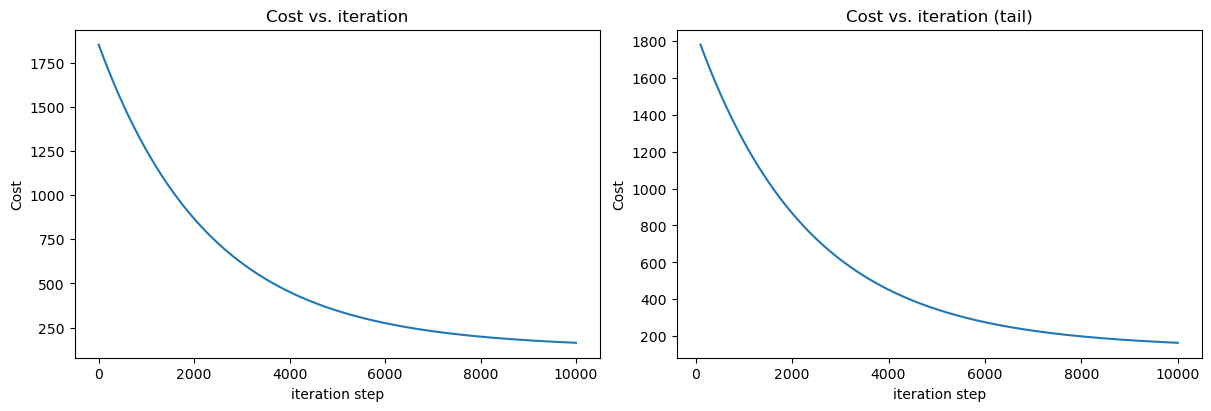

In [18]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

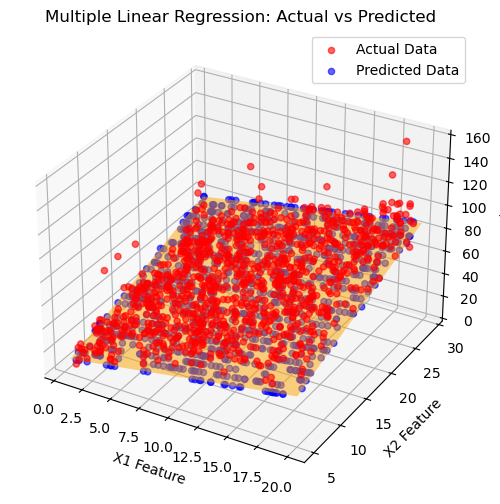

In [19]:
# Extract individual features
X1 = x_train[:, 0]  # First feature
X2 = x_train[:, 1]  # Second feature
Y_actual = y_train  # Actual target values
Y_pred = predict(x_train, w_final, b_final)  # Predicted values

# Create a figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for actual values
ax.scatter(X1, X2, Y_actual, color='red', alpha=0.6, label="Actual Data")

# Scatter plot for predicted values
ax.scatter(X1, X2, Y_pred, color='blue', alpha=0.6, label="Predicted Data")

# Create a mesh grid for the regression plane
X1_grid, X2_grid = np.meshgrid(np.linspace(X1.min(), X1.max(), 20),
                               np.linspace(X2.min(), X2.max(), 20))
Y_grid = w_final[0] * X1_grid + w_final[1] * X2_grid + b_final

# Plot the regression plane
ax.plot_surface(X1_grid, X2_grid, Y_grid, alpha=0.5, color='orange')

# Labels and title
ax.set_xlabel('X1 Feature')
ax.set_ylabel('X2 Feature')
ax.set_zlabel('Y')
ax.set_title('Multiple Linear Regression: Actual vs Predicted')
ax.legend()

plt.show()




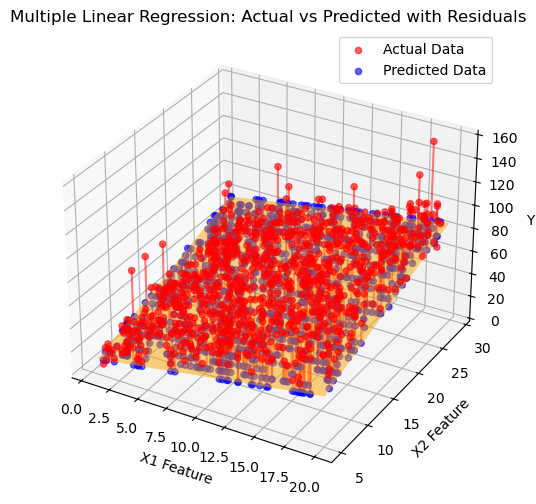

In [20]:
# Extract individual features
X1 = x_train[:, 0]  # First feature
X2 = x_train[:, 1]  # Second feature
Y_actual = y_train  # Actual target values
Y_pred = predict(x_train, w_final, b_final)  # Predicted values

# Create a figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for actual values (red)
ax.scatter(X1, X2, Y_actual, color='red', alpha=0.6, label="Actual Data")

# Scatter plot for predicted values (blue)
ax.scatter(X1, X2, Y_pred, color='blue', alpha=0.6, label="Predicted Data")

# Create a mesh grid for the regression plane
X1_grid, X2_grid = np.meshgrid(np.linspace(X1.min(), X1.max(), 20),
                               np.linspace(X2.min(), X2.max(), 20))
Y_grid = w_final[0] * X1_grid + w_final[1] * X2_grid + b_final

# Plot the regression plane (orange)
ax.plot_surface(X1_grid, X2_grid, Y_grid, alpha=0.5, color='orange')

# Plot residuals as vertical lines
for i in range(len(X1)):
    color = 'blue' if Y_pred[i] > Y_actual[i] else 'red'  # Overestimate (blue) vs. Underestimate (red)
    ax.plot([X1[i], X1[i]], [X2[i], X2[i]], [Y_actual[i], Y_pred[i]], color=color, alpha=0.5)

# Labels and title
ax.set_xlabel('X1 Feature')
ax.set_ylabel('X2 Feature')
ax.set_zlabel('Y')
ax.set_title('Multiple Linear Regression: Actual vs Predicted with Residuals')
ax.legend()

plt.show()


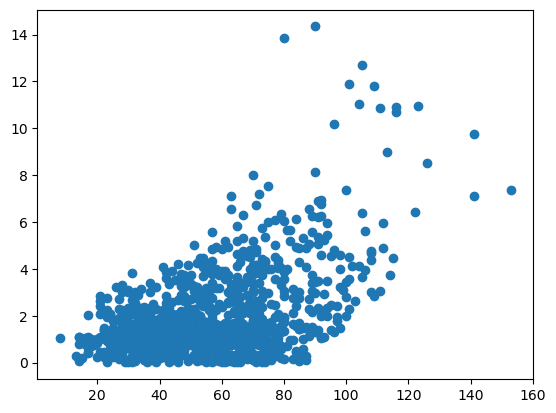

In [21]:
plt.scatter(y_train,(((Y_pred-y_train)**2)/(Y_pred))**(1/2))
plt.show()

In [22]:
def z_score_normalization(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X,axis=0)
    X_norm = (X-mu)/sigma
    return (X_norm,mu,sigma)

In [ ]:
X_norm,mu,sigma = z_score_normalization(x_train)
print(mu,sigma)

[10.06 16.98] [5.69 7.2 ]


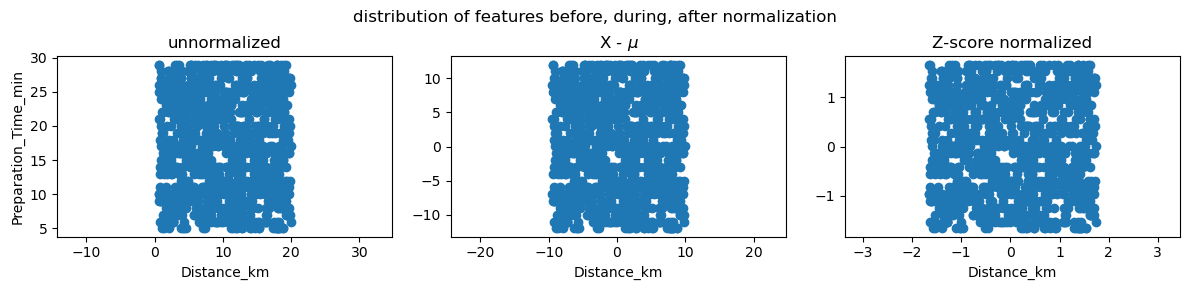

In [26]:
X_mean = X_norm * sigma

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(x_train[:,0], x_train[:,1])
ax[0].set_xlabel('Distance_km'); ax[0].set_ylabel('Preparation_Time_min');
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,1])
ax[1].set_xlabel('Distance_km'); ax[0].set_ylabel('Preparation_Time_min');
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,1])
ax[2].set_xlabel('Distance_km'); ax[0].set_ylabel('Preparation_Time_min');
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

In [29]:
initial_w = np.zeros_like(w_init)
initial_b = 0
iterations = 10000
alpha = 0.001
w_final, b_final, J_hist = gradient_descent(X_norm,y_train,initial_w,initial_b,compute_cost,compute_gradient,alpha,iterations)
print(w_final, b_final)

Iteration    0: Cost  1849.02   
Iteration 1000: Cost   311.55   
Iteration 2000: Cost   103.43   
Iteration 3000: Cost    75.26   
Iteration 4000: Cost    71.45   
Iteration 5000: Cost    70.93   
Iteration 6000: Cost    70.86   
Iteration 7000: Cost    70.85   
Iteration 8000: Cost    70.85   
Iteration 9000: Cost    70.85   
[17.29  6.94] 56.72943722573606


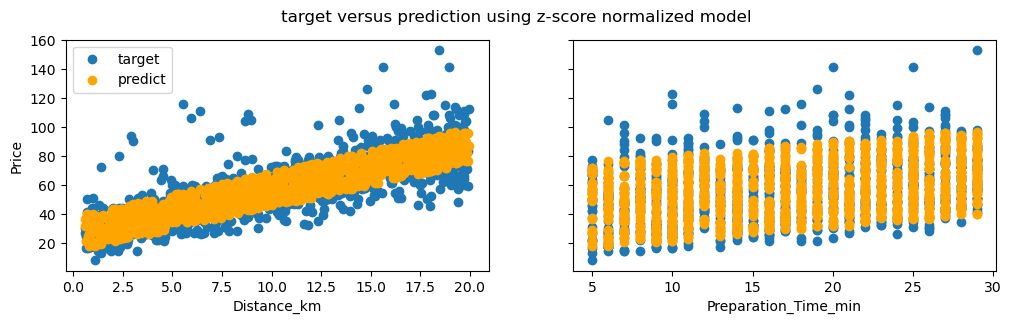

In [34]:
#predict target using normalized features
m = X_norm.shape[0]
yp = predict(X_norm,w_final,b_final)
X_features = np.array(['Distance_km','Preparation_Time_min'])
    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,2,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(x_train[:,i],yp,color='orange', label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()